In [1]:
# Append system path to include the config scripts
import sys
import os
from copy import deepcopy

print('importing lanfactory')
import lanfactory

print('importing ssms')
import ssms

print('importing hddm')
# import hddm

sys.path.insert(1, os.path.join(sys.path[0], '..'))
from config import *
import config
import matplotlib.pyplot as plt

#import tensorflow
import torch

import pandas as pd

import sklearn 
from sklearn.linear_model import LinearRegression
#from kabuki.analyze import gelman_rubin

importing lanfactory


/users/afengler/data/software/miniconda3/envs/lan_pipeline/lib/python3.10/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(


importing ssms
importing hddm
importing lanfactory
importing ssms


In [ ]:
help(lanfactory.trainers.torch_mlp.LoadTorchMLPInfer)

In [ ]:
lanfactory.trainers.torch_mlp

In [3]:
import pickle
# 7532b4bcdcc011edba8aa0423f3e9b4e
# f9514dbcdcc011ed8cc6a0423f3e9b72
network_config = pickle.load(open('/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/networks/cpn/torch/ddm_deadline/' + \
                                  '7532b4bcdcc011edba8aa0423f3e9b4e' + \
                                  '_cpn_ddm_network_config.pickle', 'rb'))
network = lanfactory.trainers.torch_mlp.LoadTorchMLP(model_file_path = '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/' + \
                                                                       'networks/cpn/torch/ddm_deadline/' + \
                                                                       '7532b4bcdcc011edba8aa0423f3e9b4e' + \
                                                                       '_cpn_ddm_train_state_dict_torch.pt',
                                                     network_config = network_config,
                                                     input_dim = len(ssms.config.model_config['ddm_deadline']['params']))
network.net.eval()

tanh
tanh
tanh
tanh
linear


TorchMLP(
  (layers): ModuleList(
    (0): Linear(in_features=5, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=120, bias=True)
    (3): Tanh()
    (4): Linear(in_features=120, out_features=120, bias=True)
    (5): Tanh()
    (6): Linear(in_features=120, out_features=120, bias=True)
    (7): Tanh()
    (8): Linear(in_features=120, out_features=1, bias=True)
  )
)

In [43]:
ssms.config.model_config['ddm_deadline']['params']

['v', 'a', 'z', 't', 'deadline']

In [64]:
network.net.training

True

In [79]:
import numpy as np
theta = np.zeros((1000, 5)).astype(np.float32)
theta[:, 0] = 2.0 #np.linspace(2, -2, 1000)
theta[:, 1] = 1.0
theta[:, 2] = 0.5
theta[:, 3] = 0.2
theta[:, 4] = np.linspace(0.5, 5.0, 1000)

In [69]:
theta

array([[1.        , 0.5       , 0.5       , 0.1       , 0.1       ],
       [1.        , 0.5       , 0.5       , 0.1       , 0.1049049 ],
       [1.        , 0.5       , 0.5       , 0.1       , 0.10980981],
       ...,
       [1.        , 0.5       , 0.5       , 0.1       , 4.99019   ],
       [1.        , 0.5       , 0.5       , 0.1       , 4.9950953 ],
       [1.        , 0.5       , 0.5       , 0.1       , 5.        ]],
      dtype=float32)

In [6]:
cnt = 0
print('data' if cnt == 0 else None)

data


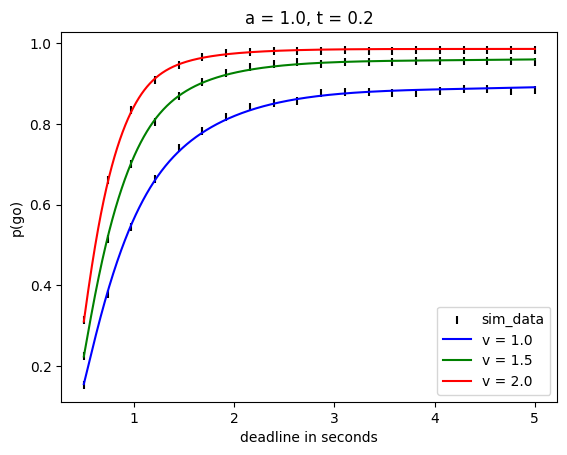

In [4]:
colors = ['blue', 'green', 'red']
cnt = 0
for v_tmp in [1.0, 1.5, 2.0]:
    # Make parameter set
    theta = np.zeros((1000, 5)).astype(np.float32)
    theta[:, 0] = v_tmp #np.linspace(2, -2, 1000)
    theta[:, 1] = 1.0
    theta[:, 2] = 0.5
    theta[:, 3] = 0.2
    theta[:, 4] = np.linspace(0.5, 5.0, 1000)
    
    sim_linspace = np.linspace(0.5, 5.0, 20)
    choice_p_vec = []
    for d_tmp in sim_linspace:
        out_sim = ssms.basic_simulators.simulator(model = 'ddm_deadline',
                                                  theta = [v_tmp, 1.0, 0.5, 0.2, d_tmp],
                                                  n_samples = 10000)
        choice_p_vec.append(np.sum(out_sim['choices'] == 1) / out_sim['choices'].shape[0])
    
    plt.scatter(sim_linspace,
                choice_p_vec,
                color = 'black',
                label = 'sim_data' if cnt == 0 else None,
                marker = '|'
                )
    
    plt.plot(np.linspace(0.5, 5.0, 1000),
             np.exp(network(torch.tensor(theta).cuda()).cpu().flatten().numpy()),
             color = colors[cnt],
             label = 'v = ' + str(theta[0, 0]))
    plt.xlabel('deadline in seconds')
    plt.ylabel('p(go)')
    plt.title('a = ' + str(theta[0, 1]) + \
              ', t = ' + str(theta[0, 3]))
    
    cnt += 1
plt.legend()

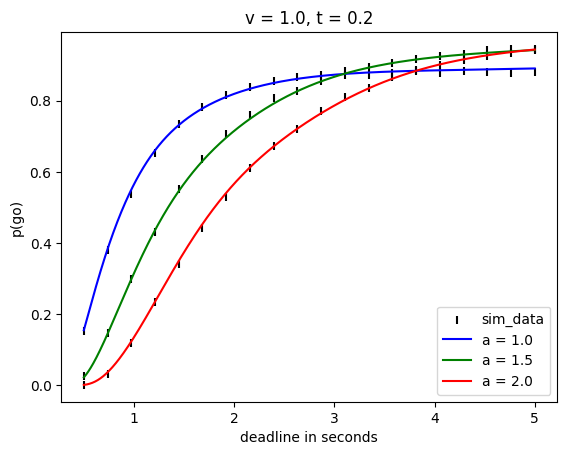

In [5]:
colors = ['blue', 'green', 'red']
cnt = 0
for a_tmp in [1.0, 1.5, 2.0]:
    # Make parameter set
    theta = np.zeros((1000, 5)).astype(np.float32)
    theta[:, 0] = 1.0 #np.linspace(2, -2, 1000)
    theta[:, 1] = a_tmp
    theta[:, 2] = 0.5
    theta[:, 3] = 0.2
    theta[:, 4] = np.linspace(0.5, 5.0, 1000)
    
    sim_linspace = np.linspace(0.5, 5.0, 20)
    choice_p_vec = []
    for d_tmp in sim_linspace:
        out_sim = ssms.basic_simulators.simulator(model = 'ddm_deadline',
                                                  theta = [1.0, a_tmp, 0.5, 0.2, d_tmp],
                                                  n_samples = 10000)
        choice_p_vec.append(np.sum(out_sim['choices'] == 1) / out_sim['choices'].shape[0])
    
    plt.scatter(sim_linspace,
                choice_p_vec,
                color = 'black',
                label = 'sim_data' if cnt == 0 else None,
                marker = '|'
                )
    
    plt.plot(np.linspace(0.5, 5.0, 1000),
             np.exp(network(torch.tensor(theta).cuda()).cpu().flatten().numpy()),
             color = colors[cnt],
             label = 'a = ' + str(theta[0, 1]))
    plt.xlabel('deadline in seconds')
    plt.ylabel('p(go)')
    plt.title('v = ' + str(theta[0, 0]) + \
              ', t = ' + str(theta[0, 3]))
    
    cnt += 1
plt.legend()

In [16]:
# network(torch.tensor(theta).cuda()).cpu()

In [17]:
# help(np.tile)

In [74]:
#rts[::-1]

In [3]:
x = np.tile(np.array(params_tmp), reps = (2000, 1))
rts = np.expand_dims(np.concatenate([rts_tmp[::-1], rts_tmp]), axis = 1)
choices = np.expand_dims(np.concatenate( [np.repeat(-1, 1000), np.repeat(1, 1000)]), axis = 1)
net_input = np.hstack([x, rts, choices]).astype(np.float32)                 

NameError: name 'params_tmp' is not defined

In [94]:
np.exp(network.predict_on_batch(net_input))

array([[1.2776508e-07],
       [1.2798337e-07],
       [1.2820448e-07],
       ...,
       [1.4578460e-07],
       [1.4508848e-07],
       [1.4440670e-07]], dtype=float32)

In [6]:
ssms.config.model_config['gamma_drift']['params']

['v', 'a', 'z', 't', 'shape', 'scale', 'c']

In [7]:
ssms.config.model_config['gamma_drift']['default_params']

[0.0, 1.0, 0.5, 0.25, 5.0, 0.5, 1.0]

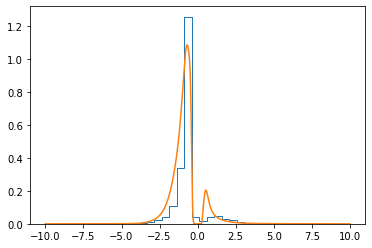

In [14]:
params_tmp = ssms.config.model_config['gamma_drift']['default_params']
params_tmp[ssms.config.model_config['gamma_drift']['params'].index('c')] = -2
params_tmp[ssms.config.model_config['gamma_drift']['params'].index('shape')] = 1.2
#params_tmp[ssms.config.model_config['gamma_drift']['params'].index('shape')] = 1.2


# Make network input
x = np.tile(np.array(params_tmp), reps = (2000, 1))
rts_tmp = np.linspace(0, 10, 1000)
rts = np.expand_dims(np.concatenate([rts_tmp[::-1], rts_tmp]), axis = 1)
choices = np.expand_dims(np.concatenate( [np.repeat(-1, 1000), np.repeat(1, 1000)]), axis = 1)
net_input = np.hstack([x, rts, choices]).astype(np.float32)  


sim_out = ssms.basic_simulators.simulator(params_tmp, model='gamma_drift', n_samples = 10000)
plt.hist(sim_out['rts'] * sim_out['choices'], bins = 30, histtype = 'step', density = True)
plt.plot(rts * choices, np.exp(network.predict_on_batch(net_input)))

In [105]:
# Specify a path
PATH = "data/torch_models/state_dict_model.pt"

# Save
torch.save(net.state_dict(), PATH)

# Load
model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()

Net(
  (fc_in): Linear(in_features=6, out_features=100, bias=True)
  (fc_hidden1): Linear(in_features=100, out_features=100, bias=True)
  (fc_hidden2): Linear(in_features=100, out_features=100, bias=True)
  (fc_out): Linear(in_features=100, out_features=1, bias=True)
)

In [108]:
from time import time

input_tensor = torch.Tensor(np.tile([0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (1000, 1))) #.to(dev)
s_t = time()
for i in range(100):
    model(input_tensor)
e_t = (time() - s_t) / 100
print(e_t)

0.0007364153861999512


In [42]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Specify a path
PATH = "data/torch_models/entire_model.pt"

# Save
torch.save(net, PATH)

# Load
model = torch.load(PATH)
model.to(dev)
model.eval()

Net(
  (fc_in): Linear(in_features=6, out_features=100, bias=True)
  (fc_hidden1): Linear(in_features=100, out_features=100, bias=True)
  (fc_hidden2): Linear(in_features=100, out_features=100, bias=True)
  (fc_hidden3): Linear(in_features=100, out_features=100, bias=True)
  (fc_out): Linear(in_features=100, out_features=1, bias=True)
)

In [24]:
np.tile([0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (10, 1))

(10, 6)

In [214]:
# Making the relevant classes
import numpy as np
import uuid
import os
import pandas as pd
import psutil
import pickle
#import kde_info
#from lanfactory.config import 
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras.models import load_model
#from tensorflow.python.client import device_lib

import warnings
from lanfactory.utils import try_gen_folder
import torch
import torch.nn as nn
import torch.optim as optim

class Dataset(torch.utils.data.Dataset):
    def __init__(self, 
                file_IDs, 
                batch_size = 32,
                label_prelog_cutoff_low = 1e-7,
                label_prelog_cutoff_high = None
                ):

        # Initialization
        self.batch_size = batch_size
        self.file_IDs = file_IDs
        self.indexes = np.arange(len(self.file_IDs))
        self.label_prelog_cutoff_low = label_prelog_cutoff_low
        self.label_prelog_cutoff_high = label_prelog_cutoff_high
        self.tmp_data = None

        # get metadata from loading a test file

        self.__init_file_shape()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor((len(self.file_IDs) * self.file_shape_dict['inputs'][0]) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch

        # Find list of IDs
        if index % self.batches_per_file == 0 or self.tmp_data == None:
            self.__load_file(file_index = self.indexes[index // self.batches_per_file])

        # Generate data
        batch_ids = np.arange(((index % self.batches_per_file) * self.batch_size), ((index % self.batches_per_file) + 1) * self.batch_size, 1)
        X, y = self.__data_generation(batch_ids)
        return X, y

    def __load_file(self, file_index):
        self.tmp_data = pickle.load(open(self.file_IDs[file_index], 'rb'))
        shuffle_idx = np.random.choice(self.tmp_data['data'].shape[0], size = self.tmp_data['data'].shape[0], replace = True)
        self.tmp_data['data'] = self.tmp_data['data'][shuffle_idx, :]
        self.tmp_data['labels'] = self.tmp_data['labels'][shuffle_idx]
        return
        #return np.random.shuffle(np.load(self.training_data_folder + '/' + self.file_IDs[file_index]))

    def __init_file_shape(self):
        init_file = pickle.load(open(self.file_IDs[0], 'rb'))
        #print('Init file shape: ', init_file['data'].shape, init_file['labels'].shape)
        
        self.file_shape_dict = {'inputs': init_file['data'].shape, 'labels': init_file['labels'].shape}
        self.batches_per_file = int(self.file_shape_dict['inputs'][0] / self.batch_size)
        self.input_dim = self.file_shape_dict['inputs'][1]
        
        if len(self.file_shape_dict['labels']) > 1:
            self.label_dim = self.file_shape_dict['labels'][1]
        else:
            self.label_dim = 1
        return

    def __data_generation(self, batch_ids = None):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        X = torch.tensor(self.tmp_data['data'][batch_ids, :]) #tmp_file[batch_ids, :-1]
        y = torch.unsqueeze(torch.tensor(self.tmp_data['labels'][batch_ids]),1) #tmp_file[batch_ids, -1]
        
        if self.label_prelog_cutoff_low is not None:
            y[y < np.log(self.label_prelog_cutoff_low)] = np.log(self.label_prelog_cutoff_low)
        
        if self.label_prelog_cutoff_high is not None:
            y[y > np.log(self.label_prelog_cutoff_high)] = np.log(self.label_prelog_cutoff_high)

        return X, y

In [215]:
import torch.nn.functional as F
import uuid
class TorchMLP(nn.Module):
    def __init__(self, network_config = None, input_shape = 10, save_folder = None, generative_model_id = 'ddm'):
        super(TorchMLP, self).__init__()
        if generative_model_id is not None:
            self.model_id = uuid.uuid1().hex + '_' + generative_model_id
        else:
            self.model_id = None
            
        self.save_folder = save_folder
        self.input_shape = input_shape
        self.network_config = network_config
        self.activations = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh()}
        self.layers = nn.ModuleList()
        
        self.layers.append(nn.Linear(input_shape, self.network_config['layer_sizes'][0]))
        self.layers.append(self.activations[self.network_config['activations'][0]])
        for i in range(len(self.network_config['layer_sizes']) - 1):
            self.layers.append(nn.Linear(self.network_config['layer_sizes'][i], self.network_config['layer_sizes'][i + 1]))
            print(self.network_config['activations'][i + 1])
            if i < (len(self.network_config['layer_sizes']) - 2):
                self.layers.append(self.activations[self.network_config['activations'][i + 1]])
            else:
                # skip last activation since
                pass
    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)
        return self.layers[i + 1](x)

In [31]:
net.model_id

'278ed526002e11ecb46da0423f3e9b42_ddm'

In [46]:
torch.nn.ReLU()

ReLU()

In [102]:
optimizer = optim.Adam(net.parameters(), lr=0.001, momentum=0.9)

TypeError: __init__() got an unexpected keyword argument 'momentum'

In [216]:
class ModelTrainerTorchMLP:
    def __init__(self, 
                 train_config = None,
                 data_loader_train = None,
                 data_loader_valid = None,
                 torch_model = None,
                 output_folder = None,
                 warm_start = False,
                 allow_abs_folder_generation = False,
                 pin_memory = True):
        
        torch.backends.cudnn.benchmark = True
        self.dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
        self.train_config = train_config
        self.model = torch_model.to(self.dev)
        self.output_folder = output_folder
        self.allow_abs_folder_generation = allow_abs_folder_generation
        self.data_loader_train = data_loader_train
        self.data_loader_valid = data_loader_valid
        self.warm_start = warm_start
        self.pin_memory = pin_memory
        
        self.__get_loss()
        self.__get_optimizer()
        self.__load_weights()
        
    def __get_loss(self):
        if self.train_config['loss'] == 'huber':
            self.loss_fun = F.huber_loss
        elif self.train_config['mse'] == 'mse':
            self.loss_fun = F.mse_loss
            
    def __get_optimizer(self):
        if self.train_config['optimizer'] == 'adam':
            self.optimizer = optim.Adam(self.model.parameters())        
        elif self.train_config['optimizer'] == 'sgd':
            self.optimizer = optim.SGD(self.model.parameters())
            
    def __load_weights(self):
        # for warmstart, not implemented at the moment
        return
    
    def train_model(self, save_history = True, save_model = True, verbose = 1):
        self.training_history = pd.DataFrame(np.zeros((self.train_config['n_epochs'], 2)), columns = ['epoch', 'val_loss'])
        
        for epoch in range(self.train_config['n_epochs']):
            self.model.train()
            cnt = 0
            epoch_s_t = time()
            #with tqdm.tqdm(self.data_loader_train , unit = 'batch') as tepoch:
            for xb, yb in self.data_loader_train:
                #tepoch.set_description('Epoch {}'.format(epoch))
                if self.pin_memory and self.dev.__str__() == 'cuda':
                    xb, yb = xb.cuda(non_blocking = True), yb.cuda(non_blocking = True)
                else:
                    xb, yb = xb.to(self.dev), yb.to(self.dev)

                pred = self.model(xb)
                loss = self.loss_fun(pred, yb)

                loss.backward()
                self.optimizer.step()
                self.optimizer.zero_grad()

                if (cnt % 100) == 0 and verbose == 1:
                    print('epoch: {}, batch: {} of {}, batch_loss: {}'.format(epoch, cnt, self.data_loader_train.__len__(), loss))
                elif (cnt % 1000) == 0 and verbose == 2:
                    print('epoch: {}, batch: {} of {}, batch_loss: {}'.format(epoch, cnt, self.data_loader_train.__len__(), loss))
                cnt += 1

            print('Epoch took {} seconds'.format(time() - epoch_s_t))
            print('STARTING VALIDATION:')
            self.model.eval()
            
            with torch.no_grad():
                valid_loss = sum(self.loss_fun(self.model(xb.to(self.dev)), yb.to(self.dev)) for xb, yb in self.data_loader_valid) / self.data_loader_valid.__len__()
            print('epoch {} / {}, validation_loss: {:2.4}'.format(epoch, self.train_config['n_epochs'], valid_loss))
            
            self.training_history.values[epoch, :] = [epoch, valid_loss]
            
        if save_model == True:
            print('Saving model and training history')
            pd.DataFrame(self.training_history).to_csv(self.output_folder + "/" + self.model.model_id + "_torch_training_history.csv")
            torch.save(self.model.state_dict(), self.output_folder + "/" + self.model.model_id + "_torch_state_dict.pt")
            
class LoadTorchMLPInfer:
    def __init__(file_path = None,
                 network_config = None,
                 input_dim = None):
        
        
        torch.backends.cudnn.benchmark = True
        self.dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
        self.model_file_path = file_path
        self.network_config = network_config
        self.input_dim = input_dim
        
        self.net = TorchMLP(network_config = self.network_config,
                            input_dim = self.input_dim,
                            generative_model_id = None)
        self.net.load_state_dict(torch.load(self.model_file_path))
        self.net.to(dev)
        self.net.eval()
        
    def predict_on_batch(x = None):
        return self.net(torch.from_numpy(x).to(dev))   

In [79]:
# Specify a path
PATH = "data/torch_models/state_dict_model.pt"

# Save
torch.save(net.state_dict(), PATH)

# Load
model = TorchMLP(network_config = {'layer_types': ['dense', 'dense', 'dense'],
                                  'layer_sizes': [100, 100, 100, 1],
                                  'activations': ['tanh', 'tanh', 'tanh', 'linear'],
                                  'loss': ['huber'],
                                  'callbacks': ['checkpoint', 'earlystopping', 'reducelr']}, input_shape = 6)
#model.load_state_dict(torch.load(PATH))
#model.eval()

print(model)

tanh
tanh
linear
TorchMLP(
  (layers): ModuleList(
    (0): Linear(in_features=6, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Tanh()
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)


In [41]:
from time import time

input_tensor = torch.Tensor(np.tile([0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (1000, 1))) # .to(dev)
s_t = time()
for i in range(100):
    model(input_tensor)
e_t = (time() - s_t) / 100
print(e_t)

TypeError: __init__() takes 1 positional argument but 2 were given

In [217]:
# Provide a unique identifier for the particular files you need from the training_data_folder
training_file_identifier = 'ddm'
train_file_excluder = ['par2', 'seq2']

# Specify training data folder:
training_data_folder = '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/lan_mlp/training_data_0_nbins_0_n_200000'

# Where do you want to save config files?
network_train_config_save_folder = '/users/afengler/data/proj_lan_pipeline/LAN_scripts/config_files/'

# Name of the config file
network_train_config_save_name = 'network_train_config_ddm_nsim_200000_dt_0005_nps_500_npts_2000.pickle'

# Get list of training files
train_val_split = 0.9
file_list = os.listdir(training_data_folder)
valid_file_list = np.array([training_data_folder + '/' + \
                       file_ for file_ in file_list if (training_file_identifier in file_ and train_file_excluder[0] not in file_ and train_file_excluder[1] not in file_ )])
val_idx_cutoff = int(0.9 * len(valid_file_list))

In [17]:
len(valid_file_list)

390

In [218]:
my_network_config = {'layer_types': ['dense', 'dense', 'dense'],
                                 'layer_sizes': [100, 100, 100, 1],
                                 'activations': ['tanh', 'tanh', 'tanh', 'linear'],
                                 'loss': ['huber'],
                                 'callbacks': ['checkpoint', 'earlystopping', 'reducelr']}

my_train_config = {'batch_size': 100000,
                   'n_epochs': 5,
                   'optimizer': 'adam',
                   'learning_rate': 0.002,
                   'loss': 'huber',
                    'metrics': None,
                    'callbacks': None}

my_train_data = Dataset(file_IDs = valid_file_list[:val_idx_cutoff],
                        batch_size = my_train_config['batch_size'],)
my_valid_data = Dataset(file_IDs = valid_file_list[val_idx_cutoff:],
                        batch_size = my_train_config['batch_size'])

my_train_loader = torch.utils.data.DataLoader(my_train_data, batch_size = None, shuffle = True, num_workers = 10, pin_memory = True)
my_valid_loader = torch.utils.data.DataLoader(my_train_data, batch_size = None, shuffle = True, num_workers = 10, pin_memory = True)


net = TorchMLP(network_config = my_network_config, input_shape = 6)
print(net)

trainer = ModelTrainerTorchMLP(train_config = my_train_config,
                               data_loader_train = my_train_loader,
                               data_loader_valid = my_valid_loader,
                               torch_model = net,
                               output_folder = '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/',
                               warm_start = False,
                               allow_abs_folder_generation = False)  

trainer.model.model_id

tanh
tanh
linear
TorchMLP(
  (layers): ModuleList(
    (0): Linear(in_features=6, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Tanh()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Tanh()
    (6): Linear(in_features=100, out_features=1, bias=True)
  )
)


'fadedeb8007811ecb46da0423f3e9b42_ddm'

In [211]:
my_train_loader.input_dim

AttributeError: 'DataLoader' object has no attribute 'input_dim'

In [68]:
trainer.model.model_id

'7cdd1f34003211ecb46da0423f3e9b42_ddm'

In [ ]:
trainer.train_model()

epoch: 0, batch: 0 of 3510, batch_loss: 3.4872536659240723
epoch: 0, batch: 100 of 3510, batch_loss: 1.926230549812317
epoch: 0, batch: 200 of 3510, batch_loss: 0.6017950177192688
epoch: 0, batch: 300 of 3510, batch_loss: 0.464552640914917
epoch: 0, batch: 400 of 3510, batch_loss: 0.34960973262786865
epoch: 0, batch: 500 of 3510, batch_loss: 0.28977394104003906
epoch: 0, batch: 600 of 3510, batch_loss: 0.23863887786865234
epoch: 0, batch: 700 of 3510, batch_loss: 0.21052594482898712
epoch: 0, batch: 800 of 3510, batch_loss: 0.18897585570812225
epoch: 0, batch: 900 of 3510, batch_loss: 0.18021658062934875
epoch: 0, batch: 1000 of 3510, batch_loss: 0.17104624211788177
epoch: 0, batch: 1100 of 3510, batch_loss: 0.15574601292610168
epoch: 0, batch: 1200 of 3510, batch_loss: 0.15176177024841309
epoch: 0, batch: 1300 of 3510, batch_loss: 0.14404910802841187
epoch: 0, batch: 1400 of 3510, batch_loss: 0.13654905557632446
epoch: 0, batch: 1500 of 3510, batch_loss: 0.13527114689350128
epoch: 0, 

In [85]:
inference_model = LoadTorchMLPInfer(file_path = '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/' + trainer.model.model_id + '_torch_state_dict.pt', 
                                    network_config = my_network_config,
                                    input_dim = 6)

TypeError: __init__() got multiple values for argument 'file_path'

In [104]:
inference_model.predict_on_batch(np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype = np.float32))

TypeError: predict_on_batch() takes from 0 to 1 positional arguments but 2 were given

In [186]:
class LoadTorchMLPInfer:
    def __init__(self, 
                 model_file_path = None,
                 network_config = None,
                 input_dim = None):
        
        
        torch.backends.cudnn.benchmark = True
        self.dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
        self.model_file_path = model_file_path
        self.network_config = network_config
        self.input_dim = input_dim
        
        self.net = TorchMLP(network_config = self.network_config,
                            input_shape = self.input_dim,
                            generative_model_id = None)
        self.net.load_state_dict(torch.load(self.model_file_path))
        #self.net.half()
        self.net.to(self.dev)
        self.net.eval()
    
    @torch.no_grad()
    def predict_on_batch(self, x = None):
        return self.net(torch.from_numpy(x).to(self.dev)).cpu().numpy()

In [187]:
inference_model = LoadTorchMLPInfer(model_file_path = '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/' + trainer.model.model_id + '_torch_state_dict.pt', 
                                    network_config = my_network_config,
                                    input_dim = 6)

tanh
tanh
linear


In [188]:
'/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/' + trainer.model.model_id + '_torch_state_dict.pt'

'/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/48dbe2ea004d11ecb46da0423f3e9b42_ddm_torch_state_dict.pt'

In [198]:
x = np.zeros((100, 6), dtype = np.float32) # , np.zeros((1000, 6), dtype = np.float), np.zeros((2000, 6), dtype = np.float32)]
#x_tensor = torch.tensor(x).to(inference_model.dev)
s_t = time()
for i in range(100):
    inference_model.predict_on_batch(x = x) # PYTORCH 
    #inference_model.net(x = x_tensor)
print((time() - s_t) / 100)

0.00020326852798461915


In [191]:
import tensorflow as tf
from tensorflow import keras

In [195]:
my_keras_model = keras.models.load_model('/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/models/02938a2cf72911eb9d58a0423f3e9be0_ddm_ckpt.h5', compile = False)

In [202]:
s_t = time()
for i in range(100):
    my_keras_model.predict_on_batch(x)
    #inference_model.net(x = x_tensor)
print((time() - s_t) / 100)

0.002927823066711426


In [ ]:
my_keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,001
Trainable params: 21,001
Non-trainable params: 0
_________________________________________________________________
